In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [12]:
carPricing = pd.DataFrame(pd.read_csv("Processed_Data.csv"))
carPricing.head()

,Unnamed: 0,x0_ACURA,x0_ASTON MARTIN,x0_AUDI,x0_BENTLEY,x0_BMW,x0_BUICK,x0_CADILLAC,x0_CHEVROLET,x0_CHRYSLER,...,x5_Silver,x5_Sky blue,x5_White,x5_Yellow,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Price
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.155377,0.865499,-0.729308,1.411612,1.331523,25089
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.893813,-0.305374,-1.123801,-0.420490,1.331523,10192
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.798368,-0.773724,-1.453610,-2.252593,-0.135882,8500
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.059931,-0.305374,0.802758,-0.420490,-1.603287,18817
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.429150,0.865499,0.814897,1.411612,0.353253,21012


In [13]:
with pd.option_context('display.max_rows', None,
                      'display.max_columns', None,
                      'display.precision', 3,
                      ):
    print(carPricing)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
X = carPricing.iloc[:, 1:-1].values
Y = carPricing.iloc[:, -1].values

In [15]:
X[0:10]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [16]:
Y[0:10]

array([25089, 10192,  8500, 18817, 21012, 13485,  2901,  3607, 16465,
        3293], dtype=int64)

In [17]:
from sklearn.decomposition import PCA
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_lin = SVR(kernel='linear', C=100)
svr_poly2 = SVR(kernel='poly', C=100, degree=2)
svr_poly3 = SVR(kernel='poly', C=100, degree=3)
svr_poly4 = SVR(kernel='poly', C=100, degree=4)

MSE = []
RMSE_rbf = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                Y, test_size=0.2,
                                                random_state=0)
    y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)
    MSE.append(mean_squared_error(Y_test, y_rbf))
    from sklearn import metrics
    print(k)
    print(MSE[-1])
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, y_rbf)))
    RMSE_rbf.append(np.sqrt(metrics.mean_squared_error(Y_test, y_rbf)))
    print("-----------------")

1
241395927.81883663
RMSE:  15536.921439552838
-----------------
2
212848564.8752112
RMSE:  14589.330514976045
-----------------
3
191137885.351338
RMSE:  13825.262578024984
-----------------
4
192667347.96038014
RMSE:  13880.466417249103
-----------------
5
191338573.6345496
RMSE:  13832.51870176034
-----------------
6
186356916.6056696
RMSE:  13651.260623314962
-----------------
7
186411986.35371923
RMSE:  13653.277494935757
-----------------
8
184173823.74409708
RMSE:  13571.065681960908
-----------------
9
182079231.48907843
RMSE:  13493.673758064497
-----------------
10
183426551.29265845
RMSE:  13543.505871548121
-----------------
11
182478871.44441393
RMSE:  13508.474060544882
-----------------
12
181367923.1738771
RMSE:  13467.290862451775
-----------------
13
181726109.14447388
RMSE:  13480.582670807442
-----------------
14
181665804.70980835
RMSE:  13478.345770524229
-----------------
15
182233299.0546053
RMSE:  13499.38143229553
-----------------
16
182358042.5979725
RMSE:  

MSE_lin = []
for k in range(1, 13):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X_scaled)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y_scaled, test_size=0.2,
                                                       random_state=0)
    y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)
    MSE_lin.append(mean_squared_error(Y_test, y_lin))
    print(k)
    print(MSE_lin[-1])
    print("-----------------")

In [18]:
MSE_lin = []
RMSE_lin = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y, test_size=0.2,
                                                       random_state=0)
    y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)
    MSE_lin.append(mean_squared_error(Y_test, y_lin))
    RMSE_lin.append(np.sqrt(mean_squared_error(Y_test, y_lin)))
    print(k)
    print(MSE_lin[-1])
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, y_lin)))
    print("-----------------")

1
246840876.4655224
RMSE:  15711.170435888042
-----------------
2
205292317.69923663
RMSE:  14328.025603663495
-----------------
3
187188013.93008262
RMSE:  13681.667074230487
-----------------
4
187523630.51964095
RMSE:  13693.926775021142
-----------------
5
183316173.17920747
RMSE:  13539.430312210608
-----------------
6
183567877.492963
RMSE:  13548.722356479337
-----------------
7
182061063.68439797
RMSE:  13493.000544148732
-----------------
8
177550105.9350091
RMSE:  13324.792904019525
-----------------
9
173325938.18180278
RMSE:  13165.3309180515
-----------------
10
171125381.73088604
RMSE:  13081.490042456404
-----------------
11
170891055.04605642
RMSE:  13072.5305525004
-----------------
12
169293941.35442773
RMSE:  13011.30052509847
-----------------
13
169291879.44904515
RMSE:  13011.221289680887
-----------------
14
167321293.32781693
RMSE:  12935.273222001031
-----------------
15
167415089.29293445
RMSE:  12938.89830290564
-----------------
16
170189362.43838885
RMSE:  

In [18]:
MSE_poly2 = []
RMSE_poly2 = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y, test_size=0.2,
                                                       random_state=0)
    y_poly2 = svr_poly2.fit(X_train, Y_train).predict(X_test)
    MSE_poly2.append(mean_squared_error(Y_test, y_poly2))
    RMSE_poly2.append(np.sqrt(mean_squared_error(Y_test, y_poly2)))
    print(k)
    print(MSE_poly2[-1])
    print('RMSE: ', np.sqrt(mean_squared_error(Y_test, y_poly2)))
    print("-----------------")

1
236310109.1596286
RMSE:  15372.381375688954
-----------------
2
244679301.49576133
RMSE:  15642.228149971517
-----------------
3
242501335.6100391
RMSE:  15572.454386192278
-----------------
4
230563660.81638214
RMSE:  15184.322863281792
-----------------
5
226964434.9110791
RMSE:  15065.338858156463
-----------------
6
213814414.47488028
RMSE:  14622.39427983257
-----------------
7
213176407.39709023
RMSE:  14600.561886348423
-----------------
8
213073661.25180328
RMSE:  14597.042894086571
-----------------
9
211768758.73811126
RMSE:  14552.276754450186
-----------------
10
210997804.96110603
RMSE:  14525.763489782767
-----------------
11
209170208.6063455
RMSE:  14462.717884489952
-----------------
12
207332011.5416864
RMSE:  14399.028145735614
-----------------
13
207443042.43662372
RMSE:  14402.883129312122
-----------------
14
207605620.63930473
RMSE:  14408.525970386587
-----------------
15
207678627.75117114
RMSE:  14411.0592168366
-----------------
16
207084684.80252057
RMSE:

In [20]:
MSE_poly3 = []
RMSE_poly3 = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y, test_size=0.2,
                                                       random_state=0)
    y_poly3 = svr_poly3.fit(X_train, Y_train).predict(X_test)
    MSE_poly3.append(mean_squared_error(Y_test, y_poly3))
    RMSE_poly3.append(np.sqrt(mean_squared_error(Y_test, y_poly3)))
    print(k)
    print(MSE_poly3[-1])
    print('RMSE: ', RMSE_poly3[-1])
    print("-----------------")

1
243443339.16469425
RMSE:  15602.670898429353
-----------------
2
221573090.54061604
RMSE:  14885.33138833718
-----------------
3
200730162.6567572
RMSE:  14167.92725336904
-----------------
4
199108976.56729087
RMSE:  14110.598023021237
-----------------
5
196191447.13119334
RMSE:  14006.83572871451
-----------------
6
188794662.33501223
RMSE:  13740.256996687225
-----------------
7
181784114.68362477
RMSE:  13482.733946927261
-----------------
8
181113130.1713216
RMSE:  13457.827840009011
-----------------
9
176019380.95823616
RMSE:  13267.229588660783
-----------------
10
174432792.0521603
RMSE:  13207.300710295056
-----------------
11
170962275.3846342
RMSE:  13075.254314338754
-----------------
12
170667606.6378703
RMSE:  13063.981270572547
-----------------
13
172144971.94027016
RMSE:  13120.40288787925
-----------------
14
171544762.2046311
RMSE:  13097.509771121802
-----------------
15
172269020.99923092
RMSE:  13125.12937076168
-----------------
16
172638791.9490469
RMSE:  13

In [26]:
MSE_poly4 = []
RMSE_poly4 = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y, test_size=0.2,
                                                       random_state=0)
    y_poly4 = svr_poly4.fit(X_train, Y_train).predict(X_test)
    MSE_poly4.append(mean_squared_error(Y_test, y_poly4))
    RMSE_poly4.append(np.sqrt(mean_squared_error(Y_test, y_poly4)))
    print(k)
    print(MSE_poly4[-1])
    print('RMSE: ', RMSE_poly4[-1])
    print("-----------------")

1
250232868.8913412
RMSE:  15818.750547731044
-----------------
2
249608486.48033395
RMSE:  15799.002705244846
-----------------
3
230871008.06254792
RMSE:  15194.44003780817
-----------------
4
214513337.4296204
RMSE:  14646.273841138585
-----------------
5
217882895.14654127
RMSE:  14760.856856786508
-----------------
6
204487101.14420366
RMSE:  14299.898641046504
-----------------
7
195222608.94522798
RMSE:  13972.208449104528
-----------------
8
198340078.58114094
RMSE:  14083.32626126161
-----------------
9
197715041.00756508
RMSE:  14061.1180568106
-----------------
10
191329555.15877262
RMSE:  13832.192709717885
-----------------
11
187348024.52688533
RMSE:  13687.513453030297
-----------------
12
187016870.177331
RMSE:  13675.411152039671
-----------------
13
188665058.38098842
RMSE:  13735.539974132376
-----------------
14
189009496.18982267
RMSE:  13748.072453614095
-----------------
15
190200229.77353463
RMSE:  13791.30993682379
-----------------
16
190648997.92753005
RMSE: 

(40,)


<Figure size 640x480 with 0 Axes>

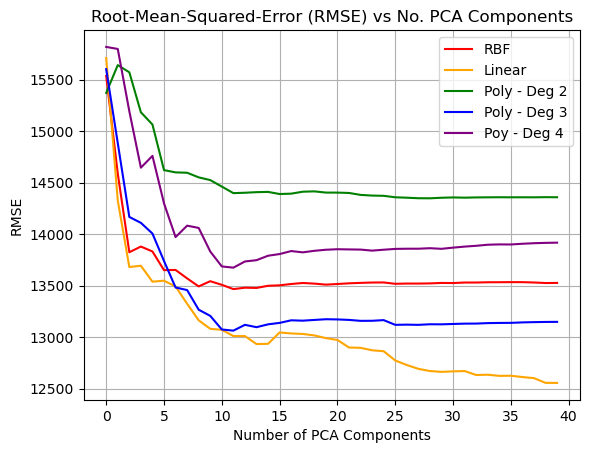

In [27]:
plt.figure(1)
fig = plt.figure(dpi=100)
print(np.array(MSE).shape)
plt.plot(RMSE_rbf, color='r', label='RBF')
plt.plot(RMSE_lin, color='orange', label='Linear')
plt.plot(RMSE_poly2, color='green', label='Poly - Deg 2')
plt.plot(RMSE_poly3, color='blue', label='Poly - Deg 3')
plt.plot(RMSE_poly4, color='purple', label='Poy - Deg 4')
plt.grid(mean_squared_error(Y_test, y_lin))
plt.xlabel('Number of PCA Components')
plt.ylabel('RMSE')
plt.title("Root-Mean-Squared-Error (RMSE) vs No. PCA Components")
plt.legend()

In [28]:
pca=PCA(n_components=40)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents)
X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                Y, test_size=0.2,
                                                random_state=0)
y_rbf = svr_lin.fit(X_train, Y_train).predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
MSE_linReg = []
RMSE_linReg = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y, test_size=0.2,
                                                       random_state=0)
    y_linReg = LinearRegression().fit(X_train, Y_train).predict(X_test)
    MSE_linReg.append(mean_squared_error(Y_test, y_linReg))
    RMSE_linReg.append(np.sqrt(mean_squared_error(Y_test, y_linReg)))
    print(k)
    print(MSE_linReg[-1])
    print('RMSE: ', RMSE_linReg[-1])
    print("-----------------")

1
229020180.79617783
RMSE:  15133.412728006126
-----------------
2
190896700.9677364
RMSE:  13816.537227820016
-----------------
3
174489054.73608685
RMSE:  13209.430522777537
-----------------
4
174450225.149313
RMSE:  13207.960673370928
-----------------
5
173065327.52127278
RMSE:  13155.429583304103
-----------------
6
172780369.95696673
RMSE:  13144.594704933535
-----------------
7
171387299.04743204
RMSE:  13091.497204194486
-----------------
8
168652203.62617892
RMSE:  12986.616327056825
-----------------
9
163760134.82519013
RMSE:  12796.879886331282
-----------------
10
161180661.467871
RMSE:  12695.694603599719
-----------------
11
158677810.70757964
RMSE:  12596.738097919622
-----------------
12
158234052.62301448
RMSE:  12579.111758109731
-----------------
13
158074377.93268588
RMSE:  12572.763337177945
-----------------
14
156597948.41390625
RMSE:  12513.910196813235
-----------------
15
156309528.6152864
RMSE:  12502.380917860663
-----------------
16
156273216.38334903
RMS

In [ ]:
plt.figure(1)
fig = plt.figure(dpi=100)
print(np.array(MSE).shape)
plt.plot(RMSE_rbf, color='r', label='RBF')
plt.plot(RMSE_lin, color='orange', label='Linear')
plt.plot(RMSE_poly2, color='green', label='Poly - Deg 2')
plt.plot(RMSE_poly3, color='blue', label='Poly - Deg 3')
plt.plot(RMSE_poly4, color='purple', label='Poy - Deg 4')
plt.plot(RMSE_linReg, color='pink', label='Linear Regression')
plt.grid(mean_squared_error(Y_test, y_lin))
plt.xlabel('Number of PCA Components')
plt.ylabel('RMSE')
plt.title("Root-Mean-Squared-Error (RMSE) vs No. PCA Components")
plt.legend()